<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import os
dest='../data'

mortality data can be download at: 
https://www.istat.it/it/archivio/240401

link for weekly dataset is: https://www.istat.it/it/files//2020/03/dati-settimanali-comune-16aprile.zip

link for daily dataset is: https://www.istat.it/it/files//2020/03/dati-giornalieri-comune-16aprile.zip



In [2]:
df_comuni_sett = pd.read_csv(os.path.join(dest, 'df_comuni_sett.csv'))

In [3]:
df_comuni_sett.loc[df_comuni_sett['NOME_REGIONE']=='Trentino-Alto Adige/Südtirol', 'NOME_REGIONE'] = 'Provincia Autonoma Trento'
df_comuni_sett.loc[df_comuni_sett['NOME_REGIONE']=="Valle d'Aosta/Vallée d'Aoste", 'NOME_REGIONE'] = "Valle d'Aosta / Vallée d'Aoste"

In [4]:
df_comuni_sett.tail()

,Unnamed: 0,REG,PROV,COD_PROVCOM,NOME_REGIONE,NOME_PROVINCIA,NOME_COMUNE,DATA_INIZIO_DIFF,SETTIMANA,CLASSE_DI_ETA,...,FEMMINE_2017,FEMMINE_2018,FEMMINE_2019,FEMMINE_2020,TOTALE_2015,TOTALE_2016,TOTALE_2017,TOTALE_2018,TOTALE_2019,TOTALE_2020
87823,87823,20,111,111106,Sardegna,Sud Sardegna,Villasor,1 aprile,01/03-07/03,75 anni e più,...,1,0,1,1,2,2,2,0,2,2
87824,87824,20,111,111106,Sardegna,Sud Sardegna,Villasor,1 aprile,08/03-14/03,75 anni e più,...,1,0,2,0,3,0,1,0,2,2
87825,87825,20,111,111106,Sardegna,Sud Sardegna,Villasor,1 aprile,15/03-21/03,75 anni e più,...,0,0,0,1,1,1,0,0,0,1
87826,87826,20,111,111106,Sardegna,Sud Sardegna,Villasor,1 aprile,22/03-28/03,75 anni e più,...,0,3,0,0,1,1,1,3,0,1
87827,87827,20,111,111106,Sardegna,Sud Sardegna,Villasor,1 aprile,29/03-04/04,75 anni e più,...,0,0,1,0,0,0,0,0,1,1


In [5]:
df_prov_deaths = df_comuni_sett.groupby(['NOME_REGIONE']).sum()[[item for item in df_comuni_sett.columns if 'TOTALE' in item]]
df_prov_deaths['excess_over_avg'] = df_prov_deaths['TOTALE_2020'] - df_prov_deaths[df_prov_deaths.columns[:-1]].mean(1)

In [6]:
df_prov_deaths

,TOTALE_2015,TOTALE_2016,TOTALE_2017,TOTALE_2018,TOTALE_2019,TOTALE_2020,excess_over_avg
NOME_REGIONE,,,,,,,
Abruzzo,580,489,570,587,559,668,111.0
Basilicata,179,152,181,185,187,187,10.2
Calabria,324,262,315,313,314,360,54.4
Campania,757,641,725,684,720,803,97.6
Emilia-Romagna,9076,8052,9073,8739,8679,11197,2473.2
Friuli-Venezia Giulia,370,352,400,387,342,420,49.8
Lazio,541,521,599,528,560,596,46.2
Liguria,4498,3944,4455,4468,4226,4723,404.8
Lombardia,21449,19156,21670,21229,21231,32790,11843.0


In [7]:
gdp_per_capita = pd.read_excel(os.path.join(dest,'Tavole.xlsx'), sheet_name='Tav.1', header=1, index_col=0)

df_prov_deaths = df_prov_deaths.merge(gdp_per_capita.mean(1).rename('gdp_per_capita'), how='left', left_index=True, right_index=True)
gdp_per_capita.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data\\Tavole.xlsx'

In [8]:
consumptions_per_capita = pd.read_excel(os.path.join(dest,'Tavole.xlsx'), sheet_name='Tav.2', header=1, index_col=0)
df_prov_deaths = df_prov_deaths.merge(consumptions_per_capita.mean(1).rename('consumptions_per_capita'), how='left', left_index=True, right_index=True)

consumptions_per_capita.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data\\Tavole.xlsx'

In [9]:
gdp_growth = pd.read_excel(os.path.join(dest,'Tavole.xlsx'), sheet_name='Tav.3', header=1, index_col=0)
df_prov_deaths = df_prov_deaths.merge(gdp_growth.mean(1).rename('gdp_growth'), how='left', left_index=True, right_index=True)

gdp_growth.head()

,2017,2018
TERRITORIO,,
Piemonte,3.164826,1.312410
Valle d'Aosta / Vallée d'Aoste,2.709178,1.204481
Lombardia,2.214853,0.528686
Provincia Autonoma Bolzano / Bozen,2.093528,2.041034
Provincia Autonoma Trento,1.612377,0.652110


In [10]:
cons_growth = pd.read_excel(os.path.join(dest,'Tavole.xlsx'), sheet_name='Tav.4', header=1, index_col=0)
df_prov_deaths = df_prov_deaths.merge(cons_growth.mean(1).rename('cons_growth'), how='left', left_index=True, right_index=True)

cons_growth.head()

,2017,2018
TERRITORIO,,
Piemonte,1.337810,0.327470
Valle d'Aosta / Vallée d'Aoste,1.639421,1.156019
Lombardia,1.220354,0.654679
Provincia Autonoma Bolzano / Bozen,1.060146,0.342497
Provincia Autonoma Trento,1.328495,1.214784


In [11]:
submerged_economy = pd.read_excel(os.path.join(dest,'Tavole.xlsx'), sheet_name='Tav.5', header=2, index_col=0)
df_prov_deaths = df_prov_deaths.merge(submerged_economy.TOTALE.rename('submerged_economy'), how='left', left_index=True, right_index=True)

submerged_economy.head()

,Rivaluzione,Lavoro irregolare,Altro*,TOTALE
TERRITORI,,,,
Piemonte,5.667533,4.190671,1.991837,11.850041
Valle d'Aosta / Vallée d'Aoste,5.705101,4.440467,1.801137,11.946706
Lombardia,4.487035,3.674155,1.668132,9.829322
Provincia Autonoma Bolzano / Bozen,2.965894,4.165815,1.776830,8.908539
Provincia Autonoma Trento,3.720413,4.452566,2.001336,10.174315


In [12]:
income_per_capita = pd.read_excel(os.path.join(dest,'Tavole.xlsx'), sheet_name='Tav. 7', header=2, index_col=0)
df_prov_deaths = df_prov_deaths.merge(income_per_capita.mean(1).rename('income_per_capita'), how='left', left_index=True, right_index=True)

income_per_capita.head()

,2016,2017,2018
TERRITORIO,,,
Piemonte,20135.372766,20634.327558,21017.774043
Valle d'Aosta / Vallée d'Aoste,20698.457808,21180.651360,21899.959469
Lombardia,22043.984494,22529.495503,22943.431563
Provincia Autonoma Bolzano / Bozen,24645.908426,25276.906886,26033.316664
Provincia Autonoma Trento,20926.629114,21281.347756,21922.203865


In [13]:
growth_income_per_capita = pd.read_excel(os.path.join(dest,'Tavole.xlsx'), sheet_name='Tav. 8', header=2, index_col=0)
df_prov_deaths = df_prov_deaths.merge(growth_income_per_capita.mean(1).rename('growth_income_per_capita'), how='left', left_index=True, right_index=True)

growth_income_per_capita.head()

,2017,2018
TERRITORIO,,
Piemonte,2.147157,1.437776
Valle d'Aosta / Vallée d'Aoste,1.846544,2.905646
Lombardia,2.343308,2.048544
Provincia Autonoma Bolzano / Bozen,3.227506,3.677805
Provincia Autonoma Trento,1.865054,3.240562


In [14]:
df_reg = pd.read_csv(os.path.join(dest,'dpc-covid19-ita-regioni.csv'))
df_reg.loc[df_reg.denominazione_regione=="Valle d'Aosta",'denominazione_regione'] = "Valle d'Aosta / Vallée d'Aoste"
df_reg.loc[df_reg.denominazione_regione=="P.A. Trento",'denominazione_regione'] = "Provincia Autonoma Trento"
df_reg.loc[df_reg['denominazione_regione'] == "Friuli Venezia Giulia", 'denominazione_regione'] = "Friuli-Venezia Giulia"
df_reg.set_index('data', inplace=True)
df_reg.index = pd.to_datetime(df_reg.index)
df_reg = df_reg.loc['2020-04-04']
df_reg = df_reg.groupby('denominazione_regione')['tamponi'].last().rename('tamponi')
df_prov_deaths = df_prov_deaths.merge(df_reg.rename('tamponi'), how='left', left_index=True, right_index=True)


In [15]:
df_pop = pd.read_csv(os.path.join(dest, 'popitaregions.csv'))
df_pop.loc[df_pop['Regione'] == "Trentino-Alto Adige", 'Regione'] = "Provincia Autonoma Trento"
df_pop.loc[df_pop['Regione'] == "Valle d'Aosta", 'Regione'] = "Valle d'Aosta / Vallée d'Aoste"
df_pop.loc[df_pop['Regione'] == "Friuli Venezia Giulia", 'Regione'] = "Friuli-Venezia Giulia"
df_pop.set_index('Regione', inplace=True)
df_prov_deaths = df_prov_deaths.merge(df_pop, how='left', left_index=True, right_index=True)
df_pop.tail()

,Popolazione,Superficie sqkm,ab/sqkm,Numero_comuni,Numero_province
Regione,,,,,
Provincia Autonoma Trento,1072276,13605,79,282,2
Umbria,882015,8464,104,92,2
Basilicata,562869,10073,56,131,2
Molise,305617,4460,69,136,2
Valle d'Aosta / Vallée d'Aoste,125666,3260,39,74,1


In [16]:
df_prov_deaths['tamponi_per_capita'] = df_prov_deaths['tamponi'] / df_prov_deaths['Popolazione']
df_prov_deaths['excess_deaths_per_100k_people'] = df_prov_deaths['excess_over_avg'] / df_prov_deaths['Popolazione']*1e5


In [17]:
df_prov_deaths

,TOTALE_2015,TOTALE_2016,TOTALE_2017,TOTALE_2018,TOTALE_2019,TOTALE_2020,excess_over_avg,gdp_per_capita,consumptions_per_capita,gdp_growth,...,income_per_capita,growth_income_per_capita,tamponi,Popolazione,Superficie sqkm,ab/sqkm,Numero_comuni,Numero_province,tamponi_per_capita,excess_deaths_per_100k_people
NOME_REGIONE,,,,,,,,,,,,,,,,,,,,,
Abruzzo,580,489,570,587,559,668,111.0,24.723568,15.423324,1.411284,...,16025.486731,1.973310,12837,1311580,10831,121,305,4,0.009787,8.463075
Basilicata,179,152,181,185,187,187,10.2,21.489589,13.643893,0.519613,...,13773.213980,1.111908,2765,562869,10073,56,131,2,0.004912,1.812145
Calabria,324,262,315,313,314,360,54.4,16.793814,13.838213,-0.180795,...,12544.107984,1.036383,12314,1947131,15221,128,404,5,0.006324,2.793854
Campania,757,641,725,684,720,803,97.6,18.363837,12.367628,0.275168,...,13249.698006,1.347778,21534,5801692,13670,424,550,5,0.003712,1.682268
Emilia-Romagna,9076,8052,9073,8739,8679,11197,2473.2,35.418013,20.654989,2.072504,...,22447.443155,2.488548,67075,4459477,22452,199,328,9,0.015041,55.459418
Friuli-Venezia Giulia,370,352,400,387,342,420,49.8,30.718664,18.887842,1.262498,...,20632.865292,1.644721,21126,1215220,7924,153,215,4,0.017385,4.098023
Lazio,541,521,599,528,560,596,46.2,33.227629,17.914376,0.428185,...,19448.970235,1.684346,44624,5879082,17232,341,378,5,0.007590,0.785837
Liguria,4498,3944,4455,4468,4226,4723,404.8,31.542048,19.991450,0.956200,...,21394.862869,2.501451,14087,1550640,5416,286,234,4,0.009085,26.105350
Lombardia,21449,19156,21670,21229,21231,32790,11843.0,38.250516,20.365961,1.371769,...,22505.637187,2.195926,141877,10060574,23863,422,1506,12,0.014102,117.716941


In [261]:
target = 'excess_deaths_per_100k_people'
feature_cols = [item for item in df_prov_deaths.columns if ('TOTAL' not in item) and ('excess' not in item)]
# feature_cols = ['growth_income_per_capita','consumptions_per_capita','gdp_growth']

In [262]:
feature_cols

['gdp_per_capita',
 'consumptions_per_capita',
 'gdp_growth',
 'cons_growth',
 'submerged_economy',
 'income_per_capita',
 'growth_income_per_capita',
 'tamponi',
 'Popolazione',
 'Superficie sqkm',
 'ab/sqkm',
 'Numero_comuni',
 'Numero_province',
 'tamponi_per_capita']

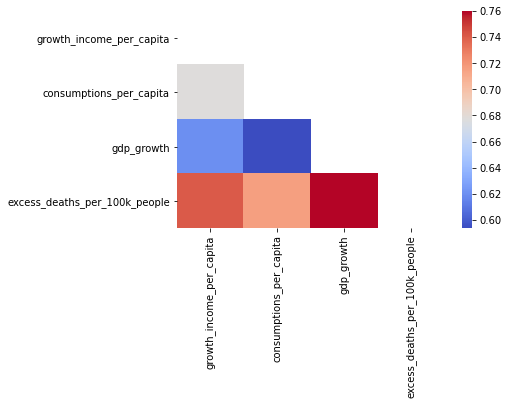

In [263]:
import seaborn as sns
corrmatrix=pd.concat([X, y],1).corr()
matrix = np.triu(corrmatrix)
sns.heatmap(corrmatrix, annot = False,  cmap= 'coolwarm', mask=matrix)

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense, Activation

In [265]:
hyper_params = {
#     'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'mae'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
#     "num_iterations": 100000,
    "n_estimators": 1000
}
model1 = lgb.LGBMRegressor(**hyper_params)
model2 = LinearRegression(fit_intercept=True, normalize=False)
model3 = RandomForestRegressor(n_estimators=500,)
model4 = Sequential()
model4.add(Dense(4, input_dim=len(feature_cols)))
model4.add(Dense(1, activation='linear'))


In [285]:
X = df_prov_deaths[feature_cols].copy()
y = np.log1p(df_prov_deaths[target].copy())
results = pd.DataFrame(np.expm1(y.copy()).rename('true'))
results['pred'] = 0
models = [model1,model2,model3,model4]
importances = []
hist = []
for region in X.index:
    print(region)
    X_train, y_train = X.loc[X.index!=region].values, y.loc[X.index!=region].values
    X_val, y_val = X.loc[X.index==region].values, y.loc[X.index==region].values
    preds = []
    for model in models:
        if (model == model2) or (model == model4):
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_val = sc.transform(X_val)
        if model == model4:
            model4.compile(optimizer='rmsprop',loss='mse')
            hist.append(np.array(model.fit(X_train, y_train, epochs=30, validation_split=0.1, verbose=0).history['val_loss']).argmin())
            
        else:
            model.fit(X_train, y_train)
        preds.append(np.expm1(model.predict(X_val).ravel()))
        if model == model3:
            importances.append(model3.feature_importances_)
    results.loc[region,  'pred'] = np.median(np.array(preds).ravel())
print('oof mae:',mean_absolute_error(results['true'], results['pred']))

Abruzzo
Basilicata
Calabria
Campania
Emilia-Romagna
Friuli-Venezia Giulia
Lazio
Liguria
Lombardia
Marche
Molise
Piemonte
Provincia Autonoma Trento
Puglia
Sardegna
Sicilia
Toscana
Umbria
Valle d'Aosta / Vallée d'Aoste
Veneto
oof mae: 21.399607256226936


In [286]:
np.median(np.array(hist))

2.5

In [287]:
results

,true,pred
NOME_REGIONE,,
Abruzzo,8.463075,9.494229
Basilicata,1.812145,2.568471
Calabria,2.793854,2.849706
Campania,1.682268,1.602834
Emilia-Romagna,55.459418,23.936403
Friuli-Venezia Giulia,4.098023,10.112348
Lazio,0.785837,6.014170
Liguria,26.105350,17.369549
Lombardia,117.716941,14.978429


Text(0, 0.5, 'predicted')

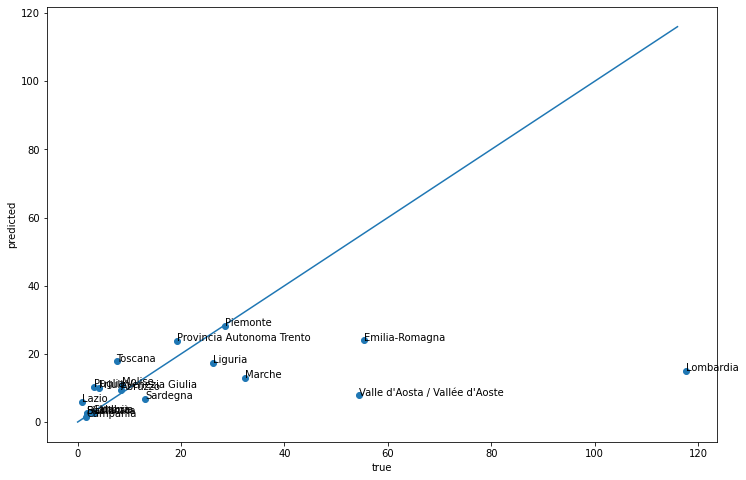

In [288]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x= results['true'].loc[results.index!='Veneto'], y=results['pred'].loc[results.index!='Veneto'])

for i, txt in enumerate(results.index):
    if txt != 'Veneto':
        ax.annotate(txt, (results['true'][i], results['pred'][i]))
ax.plot(range(int(results['true'].max())))
plt.xlabel("true")
plt.ylabel("predicted")

Text(0, 0.5, 'mortalità in eccesso')

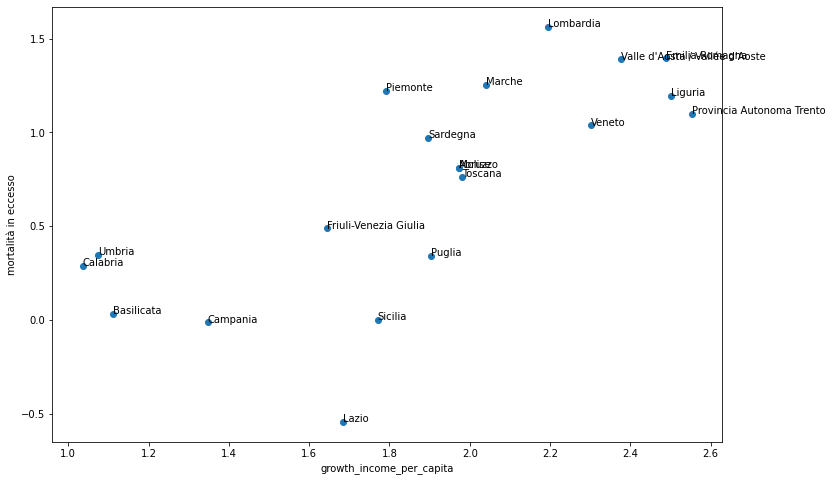

In [289]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_prov_deaths['growth_income_per_capita'], np.log(y))

for i, txt in enumerate(results.index):
    ax.annotate(txt, (df_prov_deaths['growth_income_per_capita'][i], np.log(y)[i]))

plt.xlabel("growth_income_per_capita")
plt.ylabel("mortalità in eccesso")

In [290]:
feature_importances = np.array(importances).mean(0)

In [291]:
pd.DataFrame(data=feature_importances,index=X.columns).sort_values(by=0, ascending=False)

,0
growth_income_per_capita,0.399576
consumptions_per_capita,0.159782
gdp_growth,0.136562
income_per_capita,0.086888
gdp_per_capita,0.049371
submerged_economy,0.041488
tamponi_per_capita,0.037620
cons_growth,0.018335
ab/sqkm,0.013293
Superficie sqkm,0.012360
